<a href="https://colab.research.google.com/github/notmylove/blogs/blob/master/tensorflow_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 让我们通过在2D灰度图像上创建基本卷积来探索卷积的工作原理
首先从**scipy**模块中导入‘ascent’ image，这是一张很好的图像，有很多线条和角度

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from scipy import misc

image = misc.ascent()

使用plt画出image

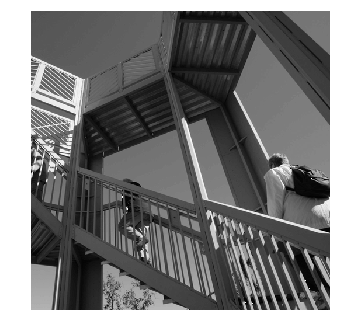

In [0]:
plt.imshow(image)
plt.axis('off')
plt.grid(False)
plt.gray()
plt.show()


image图像存储为numpy数组形式，shape为512$*$512，现在copy(image)来创建转换后的图像。

In [0]:
print(image)
print(image.shape)
image_transformed = np.copy(image)
x_size, y_size = image_transformed.shape

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]
(512, 512)


**现在我们需要创建一个3x3的过滤器**，数组里的每个元素之和要等于0或者1

In [0]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines


# filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
weight = 1

**现在我们来创建一个卷积，Stride为1，然后我们将结果乘以权重，然后要确保结果在0-255范围内**





In [0]:
for x in range(1, x_size-1):
  for y in range(1, y_size-1):
      convolution = 0.0
      convolution = convolution + (image[x-1, y-1] * filter[0][0])
      convolution = convolution + (image[x, y-1] * filter[0][1])
      convolution = convolution + (image[x+1, y-1] * filter[0][2])
      convolution = convolution + (image[x-1, y] * filter[1][0])
      convolution = convolution + (image[x, y] * filter[1][1])
      convolution = convolution + (image[x+1, y] * filter[1][2])
      convolution = convolution + (image[x-1, y+1] * filter[2][0])
      convolution = convolution + (image[x, y+1] * filter[2][1])
      convolution = convolution + (image[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      image_transformed[x, y] = convolution

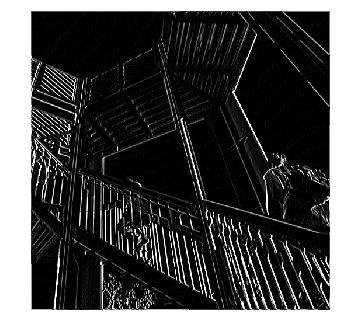

In [0]:
plt.imshow(image_transformed)
plt.gray()
plt.grid(False)
plt.axis('off')
plt.show()

In [0]:
for i in range(1, x_size-1):
  for j in range(1, y_size-1):
      convolution = 0.0
      convolution = np.sum(np.array)
      convolution = np.sum(np.sum(image[i-1:i+2, j-1:j+2]*filter))
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      image_transformed[i, j] = convolution

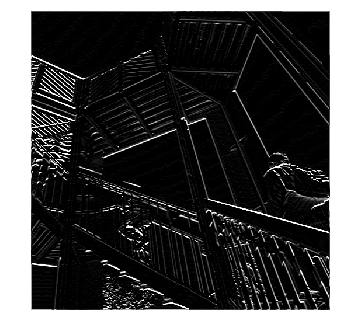

In [0]:
plt.imshow(image_transformed)
plt.gray()
plt.grid(False)
plt.axis('off')
plt.show()

**对[11]处代码进行优化**

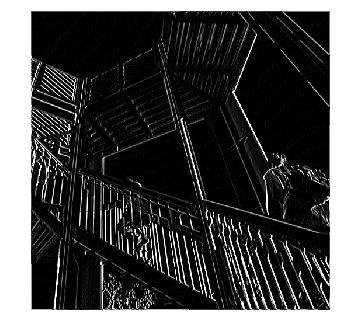

In [0]:
for i in range(1, x_size-1):
  for j in range(1, y_size-1):
      convolution = np.sum(np.sum(image[i-1:i+2, j-1:j+2]*filter.T))
      convolution = convolution * weight
      if convolution < 0:
        convolution = 0
      if convolution > 255:
        convolution = 255
      image_transformed[i, j] = convolution
      
plt.imshow(image_transformed)
plt.gray()
plt.grid(False)
plt.axis('off')
plt.show()

**接下来是使用（2, 2）pool来压缩图像**的代码。 通过迭代图像，并查看像素，它是右侧，下方和右下方的直接邻居。 取其中最大的一个并将其加载到新图像中。 因此，新图像的尺寸将是旧图像的1/4  此过程中X和Y的尺寸减半。 尽管图像被压缩，但是图像的这些突出特征依然可以被保持！

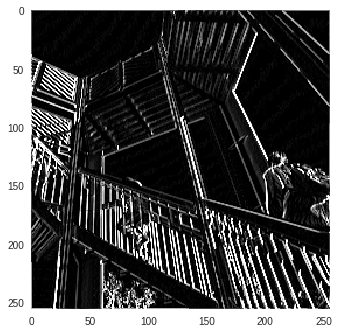

In [0]:
x_new = int(x_size/2)
y_new = int(y_size/2)
newImage = np.zeros((x_new, y_new))
for i in range(0, x_size, 2):
  for j in range(0, y_size, 2):
    pixels = []
    pixels.append(image_transformed[i, j])
    pixels.append(image_transformed[i+1, j])
    pixels.append(image_transformed[i, j+1])
    pixels.append(image_transformed[i+1, j+1])
    pixels.sort(reverse=True)
    newImage[int(i/2),int(j/2)] = pixels[0]
plt.imshow(newImage)
plt.gray()
plt.grid(False)
# plt.axis('off')
plt.show()

**对[12]处代码进行优化**

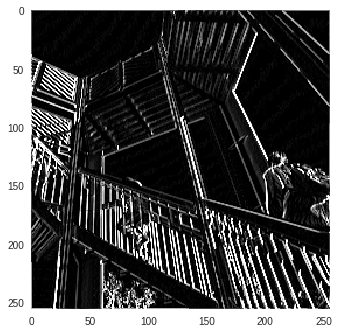

In [0]:
x_new = int(x_size/2)
y_new = int(y_size/2)
newImage = np.zeros((x_new, y_new))
for i in range(0, x_size, 2):
  for j in range(0, y_size, 2):
    newImage[int(i/2),int(j/2)] = np.max(np.max(image_transformed[i:i+2, j:j+2]))
plt.imshow(newImage)
plt.gray()
plt.grid(False)
# plt.axis('off')
plt.show()